In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../../")

from src.online_prediction.OnlineDataProcessor.filter import MultiDimExpSmoother

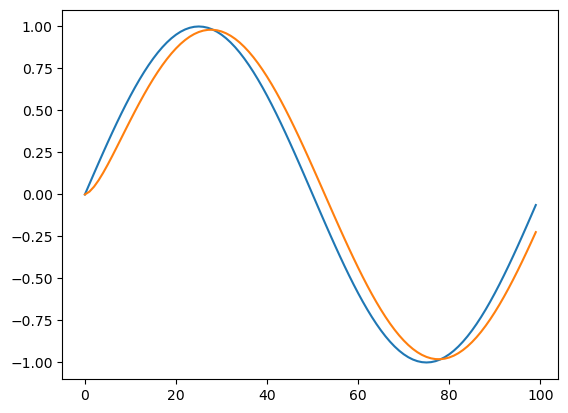

In [6]:
Ts = 0.01      # 100 Hz sampling
fc = 5.0       # 2 Hz cutoff
buf_size = 500

filt =  MultiDimExpSmoother(fc=fc, Ts=Ts, buffer_size=500)

# Fake 2D signal: sin + noisy cos
t = np.arange(0, 1, Ts)
sig = np.stack([
    np.sin(2 * np.pi * 1 * t),                 # 1 Hz
    np.cos(2 * np.pi * 5 * t) + 0.5*np.random.randn(len(t))  # 5 Hz + noise
], axis=1)  # shape (len(t), 2)

y = filt.filter(sig)  # same shape as sig

plt.plot(sig[:,0])
plt.plot(y[:,0])
plt.show()
